<a href="https://colab.research.google.com/github/Sumin0411/SKTFlyAI/blob/main/07_random_forest_multi_wine(12_27).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.데이터준비

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/winequalityN.csv

--2023-12-28 02:58:32--  https://raw.githubusercontent.com/devdio/flyai_datasets/main/winequalityN.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 390376 (381K) [text/plain]
Saving to: ‘winequalityN.csv’

winequalityN.csv    100%[===================>] 381.23K  --.-KB/s    in 0.03s   

2023-12-28 02:58:32 (10.9 MB/s) - ‘winequalityN.csv’ saved [390376/390376]



In [ ]:
wine = pd.read_csv("winequalityN.csv")
wine.shape

(6497, 13)

In [ ]:
df = wine.copy()
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
columns = cols = [ c.replace(' ', '_')  for c in df.columns]
columns

['type',
 'fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [ ]:
df.columns = columns
df.head(1)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


##### 범주형

In [ ]:
df["type"].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [ ]:
df["quality"].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
df["quality"].value_counts().sort_index()

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

### 2.테스트 데이터 분리

##### 테스트 데이터

In [ ]:
df.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
X = df.iloc[:, 1:-1]
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [ ]:
y = df.iloc[:, -1]
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=0
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5197, 11) (5197,)
(1300, 11) (1300,)


In [ ]:
# 데이터의 종류

y_train.value_counts()

6    2269
5    1710
7     863
4     173
8     154
3      24
9       4
Name: quality, dtype: int64

### 2.전처리

#### quality값을 [3, 9] 에서 [0, 6]으로 변환

In [ ]:
y_train.value_counts().sort_index()

3      24
4     173
5    1710
6    2269
7     863
8     154
9       4
Name: quality, dtype: int64

In [ ]:
y_train = y_train-3
y_train.value_counts().sort_index()

0      24
1     173
2    1710
3    2269
4     863
5     154
6       4
Name: quality, dtype: int64

#### 결측치

In [ ]:
X_train.isna().sum(axis=0)

fixed_acidity           7
volatile_acidity        5
citric_acid             3
residual_sugar          2
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      8
sulphates               4
alcohol                 0
dtype: int64

In [ ]:
# !pip install missingno

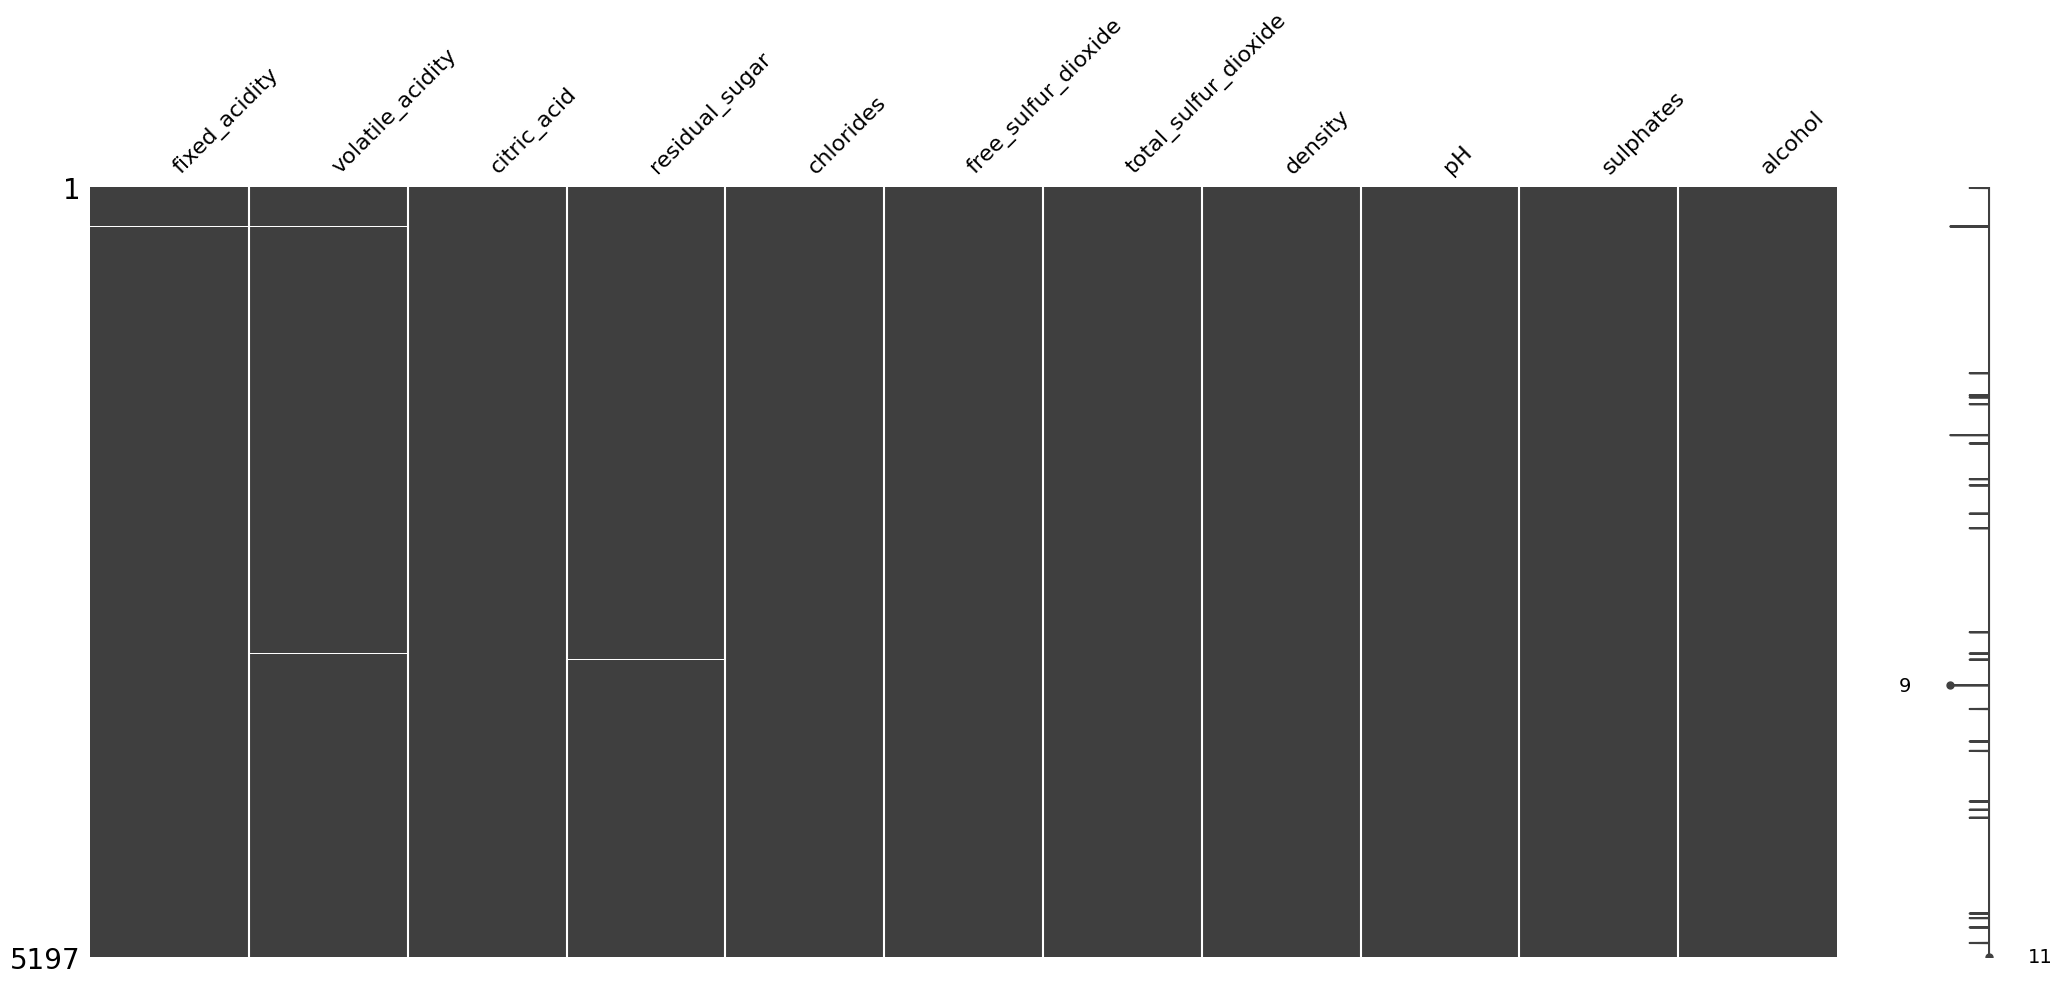

In [ ]:
import missingno as msno
msno.matrix(X_train)
plt.show()

In [ ]:
X_train = X_train.dropna()
X_train.isna().sum(axis=0)

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [ ]:
X_train.shape

(5171, 11)

- X_train을 삭제했으면 y_train도 삭제

In [ ]:
y_train.shape

(5197,)

In [ ]:
X_train.shape

(5171, 11)

In [ ]:
y_train

4209    3
4754    3
1729    3
5196    2
5623    2
       ..
5840    4
67      2
2853    3
1102    2
5071    3
Name: quality, Length: 5197, dtype: int64

In [ ]:
# X_train 결측치 제거후, y_train도 삭제

y_train = y_train[X_train.index]
y_train.shape

(5171,)

#### 스케일링
트리베이스는 스케일링이 필요없지만, 다른 알고리즘도 함께 해보기 위해서는 스케일링 작업을 해두는 것이 편리하다

In [ ]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)



###  3.학습
- 베이스모델

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_s, y_train)

RandomForestClassifier(random_state=42)

#### 테스트 데이터 전처리

In [ ]:
#### 결측치
X_test.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
6434,6.1,0.530,0.08,1.9,0.077,24.0,45.0,0.99528,3.60,0.68,10.3
6081,6.8,0.660,0.07,1.6,0.070,16.0,61.0,0.99572,3.29,0.60,9.3
780,6.0,0.395,0.00,1.4,0.042,7.0,55.0,0.99135,3.37,0.38,11.2
493,6.3,0.190,0.28,1.8,0.022,28.0,158.0,0.99070,3.20,0.64,11.4
4122,6.2,0.340,0.25,12.1,0.059,33.0,171.0,0.99769,3.14,0.56,8.7


In [ ]:
X_test.isna().sum()

fixed_acidity           3
volatile_acidity        3
citric_acid             0
residual_sugar          0
chlorides               2
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      1
sulphates               0
alcohol                 0
dtype: int64

In [ ]:
X_test = X_test.dropna()

In [ ]:
y_test = y_test[X_test.index]

In [ ]:
X_test.shape, y_test.shape

((1292, 11), (1292,))

In [ ]:
# y_test 값 변경

y_test.value_counts()

6    564
5    425
7    215
4     42
8     39
3      6
9      1
Name: quality, dtype: int64

In [ ]:
y_test = y_test - 3
y_test.value_counts().sort_index()

0      6
1     42
2    425
3    564
4    215
5     39
6      1
Name: quality, dtype: int64

In [ ]:
# 스케일링

X_test_s = scaler.transform(X_test)

In [ ]:
type(X_test_s)

numpy.ndarray

In [ ]:
# 예측

y_pred = clf.predict(X_test_s)
y_pred

array([3, 2, 1, ..., 3, 2, 3])

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def print_metrics(y_test, y_pred):
    print("accuracy:", accuracy_score(y_test, y_pred))
    print("precision:", precision_score(y_test, y_pred, average="macro"))
    print("recall:", recall_score(y_test, y_pred, average="macro"))
    print("f1:", f1_score(y_test, y_pred, average="macro"))

print_metrics(y_test, y_pred)

accuracy: 0.6764705882352942
precision: 0.5668651943393493
recall: 0.3670302472604769
f1: 0.4059024835646868
